# Importing Necessary Libraries

# Plotting Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#Metrics for Classification technique
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
#Scaler
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svc = SVC()
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataframe = pd.read_csv('heart.csv')

# Data Analysis

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholestrol      918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  1_Slope         918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [5]:
dataframe.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholestrol        0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
1_Slope           0
HeartDisease      0
dtype: int64

# Correlation Matrix

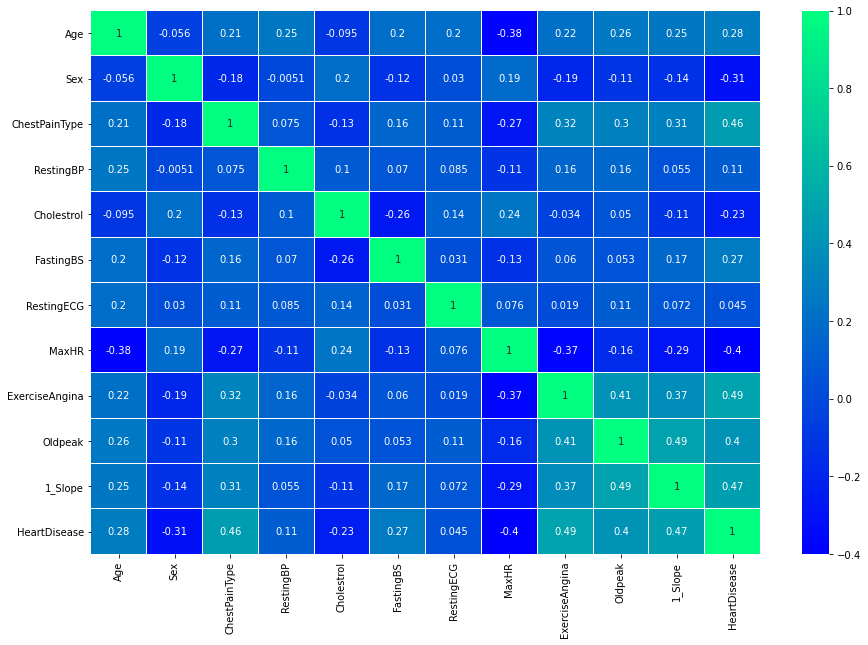

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

# Relation between each features distribution with the help of histogram.

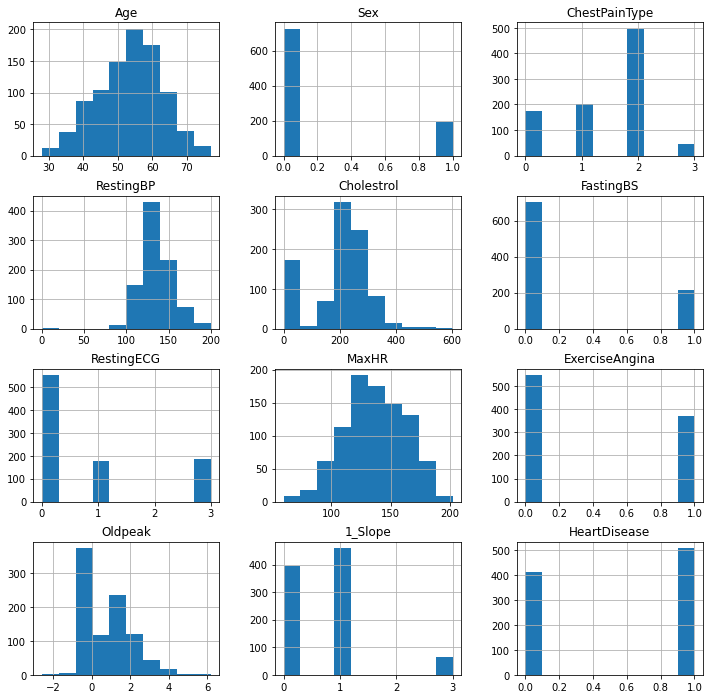

In [7]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

# Train-Test Split

In [15]:
X = dataframe.drop(columns='HeartDisease', axis=1)
y = dataframe['HeartDisease']

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

# Algorithm Implementation

# 1 Logistic Regression

Testing Accuracy for Logistic Regression: 0.8130434782608695
Testing Sensitivity for Logistic Regression: 0.7378640776699029
Testing Specificity for Logistic Regression: 0.8740157480314961
Testing Precision for Logistic Regression: 0.8260869565217391


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


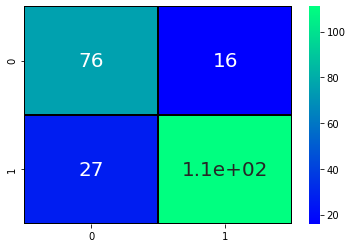

In [51]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

# 2 Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        92
           1       0.89      0.90      0.90       138

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

Testing Accuracy for Decision Tree: 0.8739130434782608
Testing Sensitivity for Decision Tree: 0.8461538461538461
Testing Specificity for Decision Tree: 0.8920863309352518
Testing Precision for Decision Tree: 0.8369565217391305


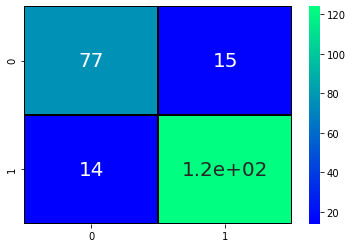

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=12, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

# 3 Random Forest Classifier

86.09
Testing Accuracy for Random Forest: 0.8608695652173913
Testing Sensitivity for Random Forest: 0.8191489361702128
Testing Specificity for Random Forest: 0.8897058823529411
Testing Precision for Random Forest: 0.8369565217391305


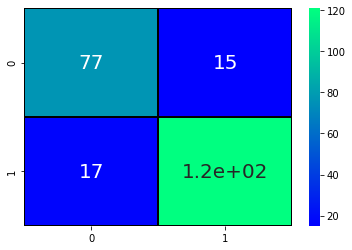

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [54]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        92
           1       0.89      0.88      0.88       138

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



# 4 Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.8478260869565217
Testing Sensitivity for Random Forest: 0.8131868131868132
Testing Specificity for Random Forest: 0.8705035971223022
Testing Precision for Random Forest: 0.8043478260869565


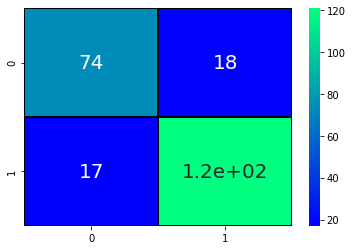

In [55]:
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [56]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        92
           1       0.87      0.88      0.87       138

    accuracy                           0.85       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230



# Final Model Implementation

In [42]:
# {Age,ChestPainType, RestingBP, Cholestrol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease}
input = (40,0,0,140,289,0,0,172,0,0,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:")
else:
  print("The patient seems to be Normal:")

The patient seems to be Normal:


In [57]:
input=(62,0,140,268,0,0,160,0,3.6,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease:")
else:
  print("The patient seems to be Normal:")

The patient seems to be have heart disease:
